#Mount Google Drive

#Import Libraries

In [42]:
import numpy as np
import pandas as pd

#Load Data

In [43]:
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [44]:
data.drop(['is_canceled','meal','arrival_date_year','arrival_date_month','arrival_date_day_of_month','meal','market_segment','distribution_channel','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','company','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests','reservation_status','reservation_status_date','is_repeated_guest','agent','country',	'children'], axis = 1, inplace = True)
# Checking for null values,'


#Binary Conversion

In [45]:
# Converting the categorical variable into numerical
varlist =  ['hotel']

# Defining the map function
def binary_map(x):
    return x.map({'Resort Hotel': 1, "City Hotel": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

# Check the housing dataframe now
data

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,babies
0,1,342,27,0,0,2,0
1,1,737,27,0,0,2,0
2,1,7,27,0,1,1,0
3,1,13,27,0,1,1,0
4,1,14,27,0,2,2,0
...,...,...,...,...,...,...,...
119385,0,23,35,2,5,2,0
119386,0,102,35,2,5,3,0
119387,0,34,35,2,5,2,0
119388,0,109,35,2,5,2,0


#Data Normalization

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['lead_time',	'arrival_date_week_number',	'stays_in_weekend_nights',	'stays_in_week_nights','adults','babies']
data[num_vars] = scaler.fit_transform(data[num_vars])
df=pd.DataFrame(data)



#Data Split

In [47]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)


#Dividing the training data set into X and Y


In [48]:
y_train = df_train.pop('hotel')
X_train = df_train
y_test = df_test.pop('hotel')
X_test = df_test
df=pd.DataFrame(data)
df1=df.dropna()
df1

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,babies
0,1,0.464043,0.500000,0.000000,0.00,0.036364,0.0
1,1,1.000000,0.500000,0.000000,0.00,0.036364,0.0
2,1,0.009498,0.500000,0.000000,0.02,0.018182,0.0
3,1,0.017639,0.500000,0.000000,0.02,0.018182,0.0
4,1,0.018996,0.500000,0.000000,0.04,0.036364,0.0
...,...,...,...,...,...,...,...
119385,0,0.031208,0.653846,0.105263,0.10,0.036364,0.0
119386,0,0.138399,0.653846,0.105263,0.10,0.054545,0.0
119387,0,0.046133,0.653846,0.105263,0.10,0.036364,0.0
119388,0,0.147897,0.653846,0.105263,0.10,0.036364,0.0


#Model Training

In [49]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train,y_train)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35817 entries, 47013 to 38200
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_time                 35817 non-null  float64
 1   arrival_date_week_number  35817 non-null  float64
 2   stays_in_weekend_nights   35817 non-null  float64
 3   stays_in_week_nights      35817 non-null  float64
 4   adults                    35817 non-null  float64
 5   babies                    35817 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB


In [50]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [51]:
print(" Training Accuracy",lr_model.score(X_train, y_train))
print(" Testing Accuracy",lr_model.score(X_test, y_test))

 Training Accuracy 0.7067234633194931
 Testing Accuracy 0.7065639221598682


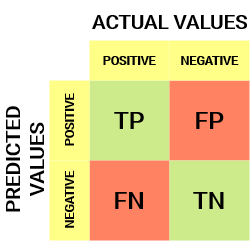

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[22672,  1135],
       [ 9375,  2635]], dtype=int64)

In [53]:
confusion_matrix(y_train, y_pred_train)

array([[53032,  2491],
       [22019,  6031]], dtype=int64)

In [54]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators=110,criterion="gini")  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm  

array([[20528,  3279],
       [ 3884,  8126]], dtype=int64)

In [55]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8000111678811738


In [61]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(max_depth=25,criterion="gini")  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm   

array([[20348,  3459],
       [ 4245,  7765]], dtype=int64)

In [62]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7849066085936846


# Save Model

In [58]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

# Deploy Model

In [59]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)

# Defining the map function
def binary_map(x):
    return x.map({'Resort Hotel': 1, "City Hotel": 0})

# Applying the function to the housing list0
input_data[varlist] = input_data[varlist].apply(binary_map)

input_data.drop(['hotel'], axis='columns', inplace=True)

input_data.at[0, 'lead_time'] = int (input('enter lead-time'))
input_data.at[0, 'arrival_date_week_number'] = int(input('enter arrival_date_week_number'))
input_data.at[0, 'stays_in_weekend_nights'] = int(input('enter stays_in_weekend_nights'))
input_data.at[0, 'stays_in_week_nights'] = int(input('enter stays_in_week_nights'))
input_data.at[0, 'adults'] = int(input('enter number of Adults'))
input_data.at[0, 'babies'] = int(input('enter number of babies'))

# Check the housing dataframe now



In [60]:


import pickle
model = pickle.load(open('model.pkl', 'rb'))
y_pred =  model.predict(input_data)

if (input_data.at[0, 'babies'] or input_data.at[0, 'stays_in_weekend_nights'] >=4):
    print("Resort Hotel")

elif y_pred[0]==1:
    print("Resort Hotel")

elif y_pred[0]==0 or (input_data.at[0, 'babies'] and input_data.at[0, 'stays_in_weekend_nights'] <3):
    print("City Hotel")

City Hotel


# Thank you